In [454]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [455]:
study_folder = r"C:\Users\Tobias\Documents\Masterarbeit_lokal\ParamStudies\BaseCase_NumberCams"

PSets_Info = pd.read_csv(Path(study_folder) / "ParameterSet.csv")
PSets_Eval = pd.read_csv(Path(study_folder) / "EvaluationParameterStudy.csv")

In [456]:
PSets_Eval

,Scaling_median,Scaling_std,Mesh2MeshDist_mean,Mesh2MeshDist_std,volume_ref,volume_rec,surface_ref,surface_rec,sphericity_ref,sphericity_rec,cam_mean_abs_error,cam_std_abs_error,cam_mean_rel_error,cam_std_rel_error,cam_outliers,cam_threshold,rec_cams,images
0,0.401862,0.000079,6.808600e-06,0.000085,0.000011,0.000011,0.003591,0.003377,0.671746,0.716247,0.000850,0.000401,0.002126,0.001002,4,0.0025,37,44
1,0.401893,0.000161,1.868590e-06,0.000086,0.000011,0.000011,0.003591,0.003374,0.671746,0.715401,0.000941,0.000415,0.002351,0.001038,15,0.0025,37,44
2,0.401883,0.000163,7.661540e-06,0.000084,0.000011,0.000011,0.003591,0.003401,0.671746,0.717147,0.002286,0.000321,0.005715,0.000802,37,0.0025,37,44
3,0.401922,0.000108,1.253330e-05,0.000081,0.000011,0.000011,0.003591,0.003384,0.671746,0.717905,0.001198,0.000133,0.002996,0.000334,56,0.0025,56,66
4,0.401887,0.000137,8.242650e-06,0.000082,0.000011,0.000011,0.003591,0.003380,0.671746,0.718192,0.001283,0.000155,0.003207,0.000386,56,0.0025,56,66
5,0.401901,0.000120,8.967740e-06,0.000084,0.000011,0.000011,0.003591,0.003385,0.671746,0.717979,0.001478,0.000137,0.003695,0.000343,56,0.0025,56,66
6,0.358057,0.000237,-1.163030e-05,0.000225,0.000011,0.000012,0.003591,0.002993,0.671746,0.824343,0.007837,0.000436,0.019591,0.001089,45,0.0025,45,88
7,0.401802,0.000127,5.640070e-06,0.000084,0.000011,0.000011,0.003591,0.003399,0.671746,0.717246,0.002077,0.000185,0.005191,0.000463,77,0.0025,77,88
8,0.368661,0.000502,-1.049020e-05,0.000177,0.000011,0.000012,0.003591,0.003450,0.671746,0.720610,0.008268,0.000730,0.020670,0.001825,48,0.0025,48,88
9,0.401898,0.000131,6.226660e-07,0.000082,0.000011,0.000011,0.003591,0.003365,0.671746,0.715277,0.000550,0.000335,0.001376,0.000837,2,0.0025,95,110


Berechne Fehler in den morphologischen Größen und füge sie dem Evaluierungsdatensatz hinzu

In [457]:
sphericity_error_perc = (PSets_Eval["sphericity_rec"] - PSets_Eval["sphericity_ref"]) / PSets_Eval["sphericity_ref"]*100
vol_error_perc = (PSets_Eval["volume_rec"] - PSets_Eval["volume_ref"]) / PSets_Eval["volume_ref"]*100
PSets_Eval["sphericity_error_perc"] = sphericity_error_perc; PSets_Eval["vol_error_perc"] = vol_error_perc; 

Berechne die Positionsfehlerquote

In [458]:
r_PFQ_perc  = PSets_Eval["cam_outliers"] / PSets_Eval["rec_cams"] *100
PSets_Eval["r_PFQ_perc"] = r_PFQ_perc; 

Verkleinerer den Evaluierungsdatensatz auf die relevanten Größen

In [459]:
PSets_Eval["cam_mean_error_perc"]  = PSets_Eval["cam_mean_rel_error"]*100
PSets_Eval_small = PSets_Eval[["cam_mean_error_perc","r_PFQ_perc","vol_error_perc","sphericity_error_perc"]]
PSets_Info_small = PSets_Info[["cam_number","reps"]]

Erstelle einen wesentlichen Gesamtdatensatz

In [460]:
PSets_Bundle = pd.concat([PSets_Info_small,PSets_Eval_small],axis=1)

Plotte Auswertungsgröße über die varrierten Größe

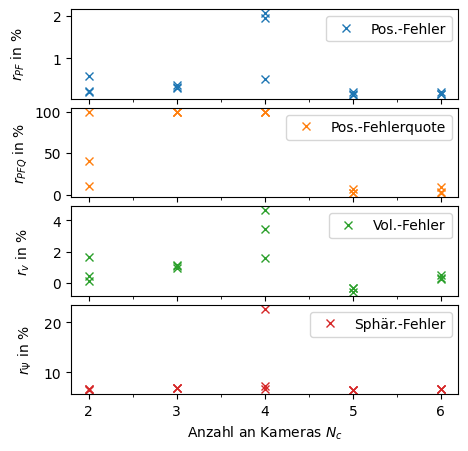

In [461]:
PSets_Eval_small.index = PSets_Info_small["cam_number"]

axes = PSets_Eval_small.plot(subplots=True, figsize=(5, 5), style='x')
plt.xticks([2, 3, 4, 5, 6])
plt.xlabel("Anzahl an Kameras $N_c$")
axes[0].legend(["Pos.-Fehler"]); axes[0].set_ylabel("$r_{PF}$ in %",labelpad=18)
axes[1].legend(["Pos.-Fehlerquote"]); axes[1].set_ylabel("$r_{PFQ}$ in %")
axes[2].legend(["Vol.-Fehler"]); axes[2].set_ylabel("$r_{v}$ in %",labelpad = 15)
axes[3].legend(["Sphär.-Fehler"]); axes[3].set_ylabel("$r_\Psi$ in %",labelpad=7)
plt.subplots_adjust(hspace=0.1)
plt.show()

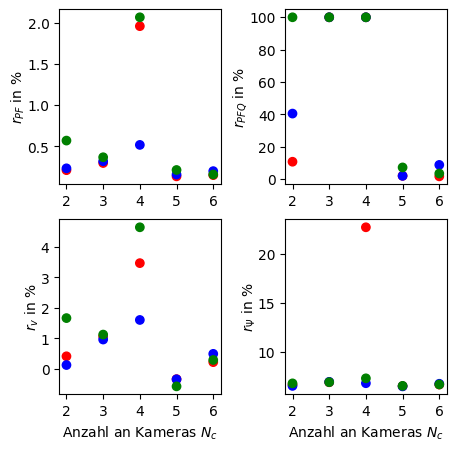

In [471]:

# Farbzuordnung basierend auf reps
color_map = {1: 'red', 2: 'blue', 3: 'green'}
colors = PSets_Info_small["reps"].map(color_map)

# Titel für die einzelnen Subplots
title = ["Positionsfehler", "Positionsfehlerquote", "Volumenfehler", "Sphärizitätsfehler"]
labels = ["$r_{PF}$ in %","$r_{PFQ}$ in %","$r_{v}$ in %","$r_\Psi$ in %"]

# Erstelle 2x2 Subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))  # Größere Größe für 2x2 Layout

# Spaltennamen aus dem DataFrame
columns = PSets_Eval_small.columns

# Anpassungen für Schriftgröße
font_size = 10

# Iteriere über die Spalten und Plots
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]  # Umrechnung für 2x2-Layout
    ax.scatter(PSets_Eval_small.index, PSets_Eval_small[column], color=colors)
    #ax.set_title(title[i], fontsize=font_size)
    if i >= len(columns)-2: ax.set_xlabel("Anzahl an Kameras $N_c$", fontsize=font_size)
    ax.set_ylabel(labels[i], fontsize=font_size,labelpad=0)  # Anpassung der Y-Achsenbeschriftung
    ax.set_xticks([2,3,4,5,6])

# Passe die Schriftgröße der Ticks an
for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=font_size)

# Passe den Platz zwischen den Subplots an
plt.subplots_adjust(hspace=0.2, wspace=0.4)


# Plot anzeigen
plt.show()


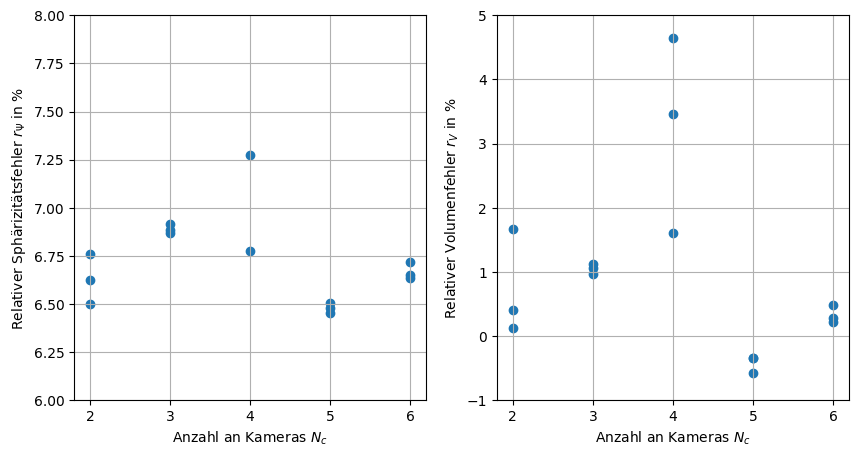

In [463]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))

ax[0].scatter(PSets_Bundle["cam_number"], PSets_Bundle["sphericity_error_perc"], marker='o')
ax[0].grid(True)
ax[0].set_xlabel("Anzahl an Kameras $N_c$")
ax[0].set_ylabel("Relativer Sphärizitätsfehler $r_\Psi$ in %")
ax[0].set_xticks([2,3,4,5,6])
ax[0].set_ylim([6,8])

ax[1].scatter(PSets_Bundle["cam_number"], PSets_Bundle["vol_error_perc"], marker='o')
ax[1].grid(True)
ax[1].set_xlabel("Anzahl an Kameras $N_c$")
ax[1].set_ylabel("Relativer Volumenfehler $r_V$ in %")
ax[1].set_xticks([2,3,4,5,6])
ax[1].set_ylim([-1,5])
plt.show()


Laufzeitanalyse

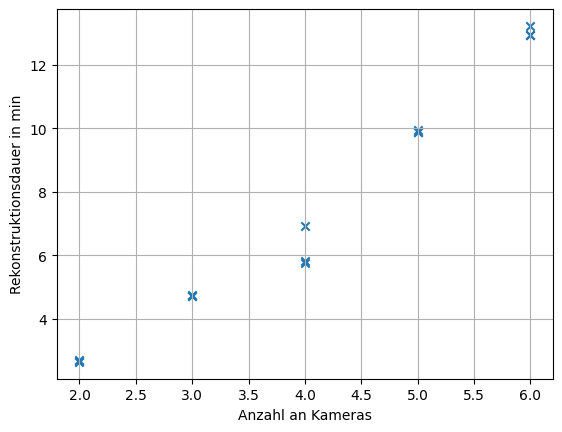

In [464]:
fig, ax = plt.subplots()  # Erstellen einer Figur und eines Subplots
ax.scatter(PSets_Info_small["cam_number"], PSets_Info["rec_time"]/60,marker="x")  # Erstellen eines Scatter-Plots
ax.set_xlabel("Anzahl an Kameras")  # Beschriftung der x-Achse
ax.set_ylabel("Rekonstruktionsdauer in min")  # Beschriftung der y-Achse
ax.grid(True)
plt.show()  # Anzeigen des Plots

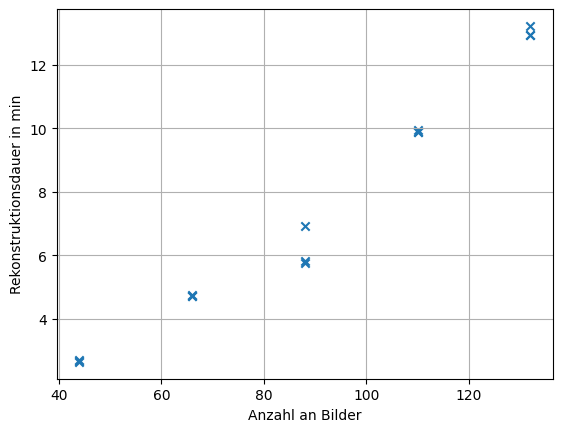

In [465]:
fig, ax = plt.subplots()  # Erstellen einer Figur und eines Subplots
ax.scatter(PSets_Eval["images"], PSets_Info["rec_time"]/60,marker="x")  # Erstellen eines Scatter-Plots
ax.set_xlabel("Anzahl an Bilder")  # Beschriftung der x-Achse
ax.set_ylabel("Rekonstruktionsdauer in min")  # Beschriftung der y-Achse
ax.grid(True)
plt.show()  # Anzeigen des Plots

Erstelle ein Spyder-Chart

In [466]:
reps_num = 1
PSets_Eval_small_reset = PSets_Eval_small.reset_index(drop=True)
SmallData = PSets_Eval_small_reset[PSets_Info_small["reps"]==reps_num]
matrix_without_index_and_columns = SmallData.to_numpy()
matrix_without_index_and_columns_1_minus = np.ones(np.shape(matrix_without_index_and_columns))*100 - matrix_without_index_and_columns
Dataset = ('Anzahl an Kameras',matrix_without_index_and_columns)
data = [labels,Dataset]
temp = PSets_Info_small[PSets_Info_small["reps"]==reps_num]
index = temp["cam_number"]

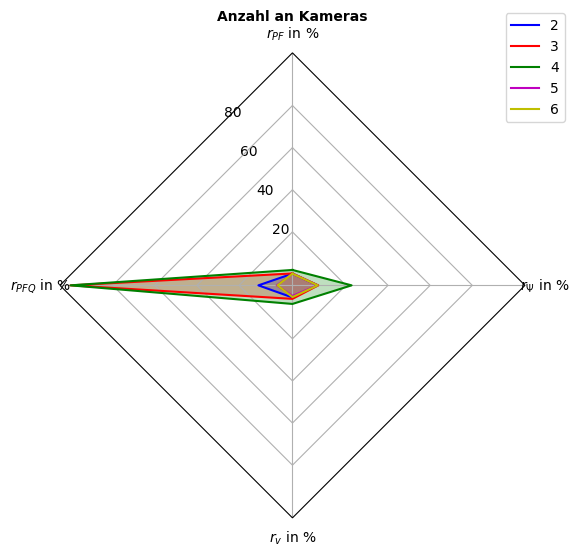

In [467]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
import copy

def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` Axes."""
    theta = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):
        def transform_path_non_affine(self, path):
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):
        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars, radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                spine = Spine(axes=self, spine_type='circle', path=Path.unit_regular_polygon(num_vars))
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5) + self.transAxes)
                return {'polar': spine}

    register_projection(RadarAxes)
    return theta


if __name__ == '__main__':
    N = 4  # Nur 4 Variablen
    theta = radar_factory(N, frame='polygon')  # Das Frame ist nun ein Viereck


    data_copy = copy.deepcopy(data)
    spoke_labels = data_copy.pop(0)  # Variablenbezeichnungen
    title, case_data = data_copy[0]  # Nur Basecase

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(top=0.85, bottom=0.05)

    colors = ['b', 'r', 'g', 'm', 'y']
    labels = index  # Legendenbeschriftungen

    # Plot the Basecase data
    ax.set_rgrids([20, 40, 60, 80])
    ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                 horizontalalignment='center', verticalalignment='center')

    # Plot und Füllen der Daten und Zuweisung der Labels für die Legende
    for d, color, label in zip(case_data, colors, labels):
        ax.plot(theta, d, color=color, label=label)  # Label für Legende setzen
        ax.fill(theta, d, facecolor=color, alpha=0.25)

    # Setze die Variablenbezeichnungen
    ax.set_varlabels(spoke_labels)

    # Legende hinzufügen
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    plt.show()
